## **Import Libraries**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer # Another way for imputation

# Configure settings
%matplotlib inline
sns.set(style="ticks")
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


## **Load Data and Basic Info**

In [64]:
# Load the dataset
df = pd.read_csv('titanic.csv')


In [65]:
# Display basic info
print("--- Initial DataFrame Info ---")
df.info()


--- Initial DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
print("\n--- First 5 Rows ---\n")
display(df.head()) # Use display() for better DataFrame formatting



--- First 5 Rows ---



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
print("\n--- Missing Values (Initial) ---\n")
print(df.isnull().sum())



--- Missing Values (Initial) ---

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [68]:
print("\n--- Basic Descriptive Statistics ---\n")
display(df.describe(include='all')) # include='all' shows stats for both numeric and object types



--- Basic Descriptive Statistics ---



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## **Handle Missing Values**

In [69]:
# Strategy:
# 1. Age: Numerical. Has a fair number of missing values. Impute with the median (less sensitive to outliers than mean).
# 2. Cabin: Categorical. Has a *lot* of missing values. Simplest strategy is often to drop the column.
# 3. Embarked: Categorical. Only 2 missing values. Impute with the mode (most frequent value).

print("--- Handling Missing Values ---\n")

# Impute Age with Median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)
print(f"Imputed 'Age' with median: {age_median}")
print("\n")

# Impute Embarked with Mode
embarked_mode = df['Embarked'].mode()[0] # mode() returns a Series, [0] gets the first mode
df['Embarked'].fillna(embarked_mode, inplace=True)
print(f"Imputed 'Embarked' with mode: {embarked_mode}")
print("\n")

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)
print("Dropped 'Cabin' column due to high number of missing values.")
print("\n")


--- Handling Missing Values ---

Imputed 'Age' with median: 28.0


Imputed 'Embarked' with mode: S


Dropped 'Cabin' column due to high number of missing values.




In [70]:
# Verify that missing values are handled
print("\n--- Missing Values (After Handling) ---\n")
print(df.isnull().sum())



--- Missing Values (After Handling) ---

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## **Convert Categorical Features to Numerical**


In [71]:
# Strategy:
# 1. Identify categorical columns that need encoding: 'Sex', 'Embarked'.
# 2. 'Pclass' is numerical but represents categories; treat as is for now or encode if model requires.
# 3. 'Name', 'Ticket', 'PassengerId' are identifiers or high cardinality text, generally not useful for basic models - drop them.
# 4. Use One-Hot Encoding for nominal variables ('Sex', 'Embarked') to avoid imposing ordinal relationships.

print("--- Encoding Categorical Features ---\n")

# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
print("Dropped 'Name', 'Ticket', 'PassengerId' columns.")


--- Encoding Categorical Features ---

Dropped 'Name', 'Ticket', 'PassengerId' columns.


In [72]:
# Apply One-Hot Encoding using pandas get_dummies
# drop_first=True helps avoid multicollinearity (dummy variable trap)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [19]:
print("\n--- DataFrame after Encoding ---")
display(df.head())



--- DataFrame after Encoding ---


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [73]:
df.info() # Check data types again - all should be numeric (int or float) except maybe Pclass if left as int


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


## **Normalize/Standardize Numerical Features**


In [74]:
# Strategy:
# Standardize numerical features ('Age', 'Fare', 'SibSp', 'Parch', 'Pclass')
# Standardization (Z-score scaling) scales data to have mean=0 and std=1.
# It's often preferred over Normalization for algorithms sensitive to feature scales
# and when outliers are present.
# Exclude the target variable ('Survived') and the dummy variables from scaling.

print("--- Scaling Numerical Features (Standardization) ---\n")

# Identify columns to scale
cols_to_scale = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
print(f"Columns to be scaled: {cols_to_scale}")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


--- Scaling Numerical Features (Standardization) ---

Columns to be scaled: ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']


In [75]:
print("\n--- DataFrame after Scaling ---\n")
display(df.head())



--- DataFrame after Scaling ---



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,True,False,True
1,1,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False
2,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,True
3,1,-1.566107,0.433312,0.432793,-0.473674,0.420730,False,False,True
4,0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,True,False,True


In [76]:
print("\n--- Statistics after Scaling (for scaled columns) ---\n")
display(df[cols_to_scale].describe()) # Mean should be ~0, std dev ~1



--- Statistics after Scaling (for scaled columns) ---



,Age,Fare,SibSp,Parch,Pclass
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18,4.386066e-17,5.382900e-17,-8.772133e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01,-4.745452e-01,-4.736736e-01,-1.566107e+00
25%,-5.657365e-01,-4.891482e-01,-4.745452e-01,-4.736736e-01,-3.693648e-01
50%,-1.046374e-01,-3.573909e-01,-4.745452e-01,-4.736736e-01,8.273772e-01
75%,4.333115e-01,-2.424635e-02,4.327934e-01,-4.736736e-01,8.273772e-01
max,3.891554e+00,9.667167e+00,6.784163e+00,6.974147e+00,8.273772e-01


## **Visualize and Remove Outliers**


In [77]:
# Strategy:
# 1. Use boxplots to visualize potential outliers in key numerical features
#    (even after scaling, the relative position of outliers can be seen,
#    but it's often easier to define thresholds based on original values or
#    IQR on the *scaled* data). Let's check 'Age' and 'Fare'.
# 2. Use the IQR method to identify and remove outliers.


--- Visualizing Outliers (Boxplots) ---


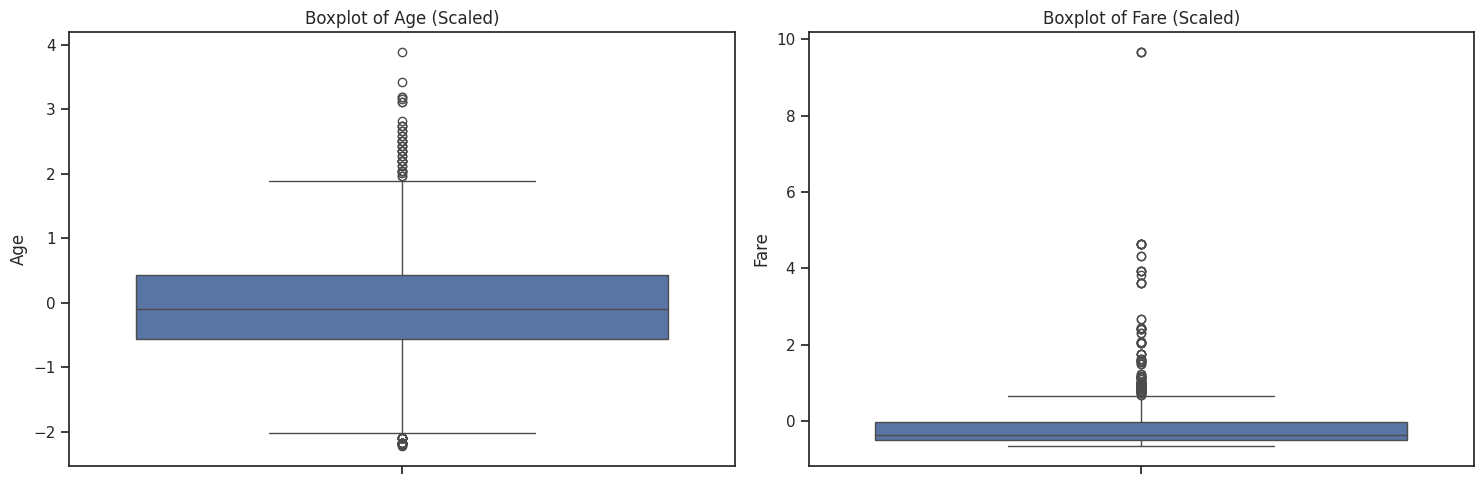

In [78]:
print("--- Visualizing Outliers (Boxplots) ---")

# Select columns to check for outliers (original numerical ones are good candidates)
# Even though we scaled them, boxplots can still show points far from the main distribution.
cols_to_check = ['Age', 'Fare'] # Focusing on these continuous variables

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Scaled)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


In [79]:
print("\n--- Removing Outliers using IQR Method (Example on 'Fare') ---\n")
# Let's focus on 'Fare' as it often has significant outliers in Titanic.
# We apply IQR on the *scaled* data here as per the flow.

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"'Fare' - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"'Fare' - Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")



--- Removing Outliers using IQR Method (Example on 'Fare') ---

'Fare' - Q1: -0.49, Q3: -0.02, IQR: 0.46
'Fare' - Lower Bound: -1.19, Upper Bound: 0.67


In [80]:
# Count outliers
outliers_count = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)].shape[0]
print(f"Number of outliers detected in 'Fare': {outliers_count}\n")
print(f"Original DataFrame shape: {df.shape}")


Number of outliers detected in 'Fare': 116

Original DataFrame shape: (891, 9)


In [81]:
# Remove outliers
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print(f"DataFrame shape after removing 'Fare' outliers: {df_no_outliers.shape}")


DataFrame shape after removing 'Fare' outliers: (775, 9)



--- Boxplot of 'Fare' (Scaled) After Outlier Removal ---



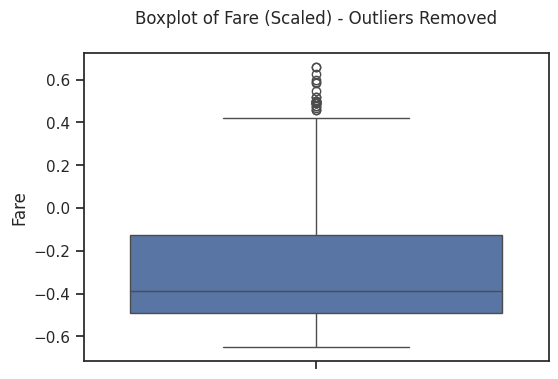

In [82]:
# Visualize 'Fare' again after removing outliers
print("\n--- Boxplot of 'Fare' (Scaled) After Outlier Removal ---\n")
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_no_outliers['Fare'])
plt.title('Boxplot of Fare (Scaled) - Outliers Removed\n')
plt.ylabel('Fare')
plt.show()


In [83]:
# IMPORTANT: Decide whether to continue with df or df_no_outliers
# For the rest of the process or modeling, use df_no_outliers.
# Assume we proceed with the cleaned data.
df = df_no_outliers
print("\n--- Final Processed DataFrame Head ---\n")
display(df.head())



--- Final Processed DataFrame Head ---



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,True,False,True
2,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,True
3,1,-1.566107,0.433312,0.432793,-0.473674,0.420730,False,False,True
4,0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,True,False,True
5,0,0.827377,-0.104637,-0.474545,-0.473674,-0.478116,True,True,False
